In [ ]:
!pip install transformers
!pip install ipywidgets
!pip install emoji
pip install --upgrade jupyter

In [ ]:
pip install pandas_profiling

# Install Package

In [57]:
#general purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string


import emoji
import nltk
from collections import Counter
from nltk.corpus import stopwords
from sklearn import preprocessing

#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import TFAutoModel, AutoTokenizer


#ROS
from imblearn.over_sampling import RandomOverSampler


#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#ProfileReport
from pandas_profiling import ProfileReport

#goole file
# from google.colab import files

from datetime import datetime, timedelta

seed = 42

# Define fuction 

In [50]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

# Loading the data

In [96]:
raw_df = pd.read_csv("/Users/apple/Desktop/combined_final_2.csv")
raw_df

,Unnamed: 0,Comment,Name,Date,Pos,Neg,Neu,Model,Source,sentiment_score
0,1.0,"I'm not sure I have ever commented on a video,...",\n @charlesconnor1737\n,3 years ago,0.207,0.070,0.723,Alfa Romeo Stelvio,Youtube,5
1,2.0,I’ve always done the cup holder test in all my...,\n @gllegacy87\n,3 years ago,0.206,0.000,0.794,Alfa Romeo Stelvio,Youtube,4
2,3.0,I absolutely love the design of the Stelvio an...,\n @driftattack11\n,4 years ago,0.133,0.136,0.731,Alfa Romeo Stelvio,Youtube,2
3,4.0,I believe the reason behind the column mounted...,\n @Black2005Lotus\n,4 years ago,0.100,0.082,0.818,Alfa Romeo Stelvio,Youtube,4
4,5.0,Finally! As a previous 4C Spider and now Giuli...,\n @DrachenBlasen\n,4 years ago,0.171,0.027,0.802,Alfa Romeo Stelvio,Youtube,5
...,...,...,...,...,...,...,...,...,...,...
60914,NaN,I suppose we should be grateful that at least ...,Wing Commander,"October 02, 2021",NaN,NaN,NaN,Porsche Macan,Forums,5
60915,NaN,Our first macan was a base on 21s with no Pasm...,sd1985,"October 02, 2021",NaN,NaN,NaN,Porsche Macan,Forums,3
60916,NaN,"For gen3, on the uk configurator PASM is not c...",BanZ,"October 02, 2021",NaN,NaN,NaN,Porsche Macan,Forums,4
60917,NaN,Well that is another reason for avoiding the 2...,Col Lamb,"October 02, 2021",NaN,NaN,NaN,Porsche Macan,Forums,1


# Delete Duplicate tweets ??

4912 duplicate comments (8.06%) have been removed.


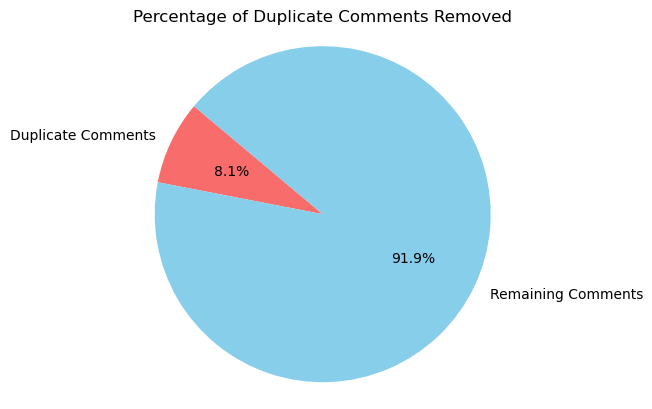

In [97]:

initial_rows = len(raw_df)  # Count the rows before removing duplicates

raw_df.drop_duplicates(subset='Comment', inplace=True)

final_rows = len(raw_df)  # Count the rows after removing duplicates

# Calculate the number and percentage of rows removed
rows_removed = initial_rows - final_rows
percentage_removed = (rows_removed / initial_rows) * 100

print(f"{rows_removed} duplicate comments ({percentage_removed:.2f}%) have been removed.")

# Create a pie chart to show the percentage of rows removed
labels = ['Duplicate Comments', 'Remaining Comments']
sizes = [percentage_removed, 100 - percentage_removed]
colors = ['#f86c6b', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Duplicate Comments Removed")
plt.show()


# Tweets count by date

In [98]:
tweets_per_day = raw_df['Date'].value_counts().sort_index().reset_index(name='counts')

In [99]:
from dateutil.parser import parse

# Assuming 'raw_df' contains a 'date' column
def parse_date_string(date_str):
    try:
        return parse(date_str)
    except:
        return None

raw_df['Date'] = raw_df['Date'].apply(parse_date_string)

none_count = raw_df['Date'].isnull().sum()
print("Total None count in 'Date' column:", none_count)


# Drop rows with invalid dates
raw_df.dropna(subset=['Date'], inplace=True)

# Convert 'Date' column to datetime format
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

# Extract the month and year from the 'Date' column
raw_df['Year'] = raw_df['Date'].dt.year
raw_df['Month'] = raw_df['Date'].dt.month

# Get unique combinations of year and month
unique_month_years = raw_df[['Year', 'Month']].drop_duplicates()

# Print the unique month-year combinations
print(unique_month_years)

Total None count in 'Date' column: 9994
       Year  Month
10322  2021     10
10329  2019      1
10342  2021      7
10374  2022      4
10377  2022      8
...     ...    ...
40730  2010      9
40734  2015      8
42312  2013      3
42693  2011      6
42926  2012      7

[139 rows x 2 columns]


In [100]:
# Assuming 'raw_df' contains a 'Date' column with datetime format
# Convert 'Date' column to datetime format (if not already)
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

# Extract the year from the 'Date' column
raw_df['Year'] = raw_df['Date'].dt.year

# Calculate the count of data per year
data_per_year = raw_df.groupby('Year').size()

print(data_per_year)


Year
2009        8
2010       21
2011       25
2012       17
2013      268
2014      286
2015     2290
2016     2396
2017     3507
2018     5475
2019     3239
2020     3212
2021     4813
2022    12547
2023     7909
dtype: int64


In [101]:
# Assuming 'raw_df' contains a 'Date' column with datetime format
# Convert 'Date' column to datetime format (if not already)
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

# Calculate the total count of data across all years
total_data_count = len(raw_df)

print("Total data count:", total_data_count)

Total data count: 46013


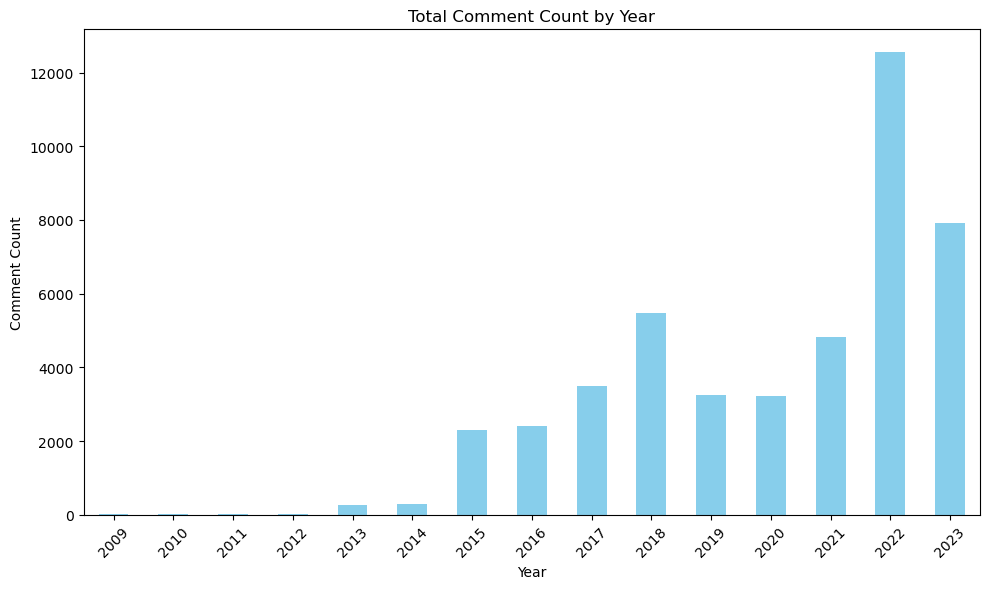

In [102]:
# 计算每年的评论总数
yearly_comment_count = raw_df.groupby('Year')['Comment'].count()

# 绘制条形图
plt.figure(figsize=(10, 6))
yearly_comment_count.plot(kind='bar', color='skyblue')
plt.title('Total Comment Count by Year')
plt.xlabel('Year')
plt.ylabel('Comment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!-- raw_df 沒處理
df 包含comment sentiment (train_data)
test_df
clean_df df -->

# Train-Test split

In [103]:
# 仅保留'Comment'和'sentiment_score'两列
raw_df = raw_df[['Comment', 'sentiment_score']]

# 使用stratify参数确保在train和test中的'sentiment_score'平均分布
train_df, test_df = train_test_split(raw_df, test_size=0.3, stratify=raw_df['sentiment_score'], random_state=42)

# 如果你需要，你还可以去掉含有NaN的行
train_df = train_df.dropna(subset=['Comment', 'sentiment_score'])
test_df = test_df.dropna(subset=['Comment', 'sentiment_score'])
train_df

,Comment,sentiment_score
29768,"Most likely yes, the front bumper isn't that d...",3
16767,Well my AUS vin worked...,4
49106,"Good to hear you are well, it looks like you w...",4
43029,What’s the background to all that road rash? ...,1
31984,"Every time I look at the front grills, it's cl...",2
...,...,...
40861,"Thanks Jetbeam, very clear and concise advise ...",4
13321,The weather was so nice this morning I took th...,5
44047,Had my first service notice pop up on the dash...,1
42888,"If it can keep up with you !!Dont know, I expe...",3


In [104]:
Counter(train_df['sentiment_score'].values)

Counter({3: 9050, 1: 6442, 2: 5807, 4: 5527, 5: 5383})

# Tweets Deep Cleaning (pre-procesisng)


In [105]:
clean_df = train_df[['Comment','sentiment_score']]
clean_df

,Comment,sentiment_score
29768,"Most likely yes, the front bumper isn't that d...",3
16767,Well my AUS vin worked...,4
49106,"Good to hear you are well, it looks like you w...",4
43029,What’s the background to all that road rash? ...,1
31984,"Every time I look at the front grills, it's cl...",2
...,...,...
40861,"Thanks Jetbeam, very clear and concise advise ...",4
13321,The weather was so nice this morning I took th...,5
44047,Had my first service notice pop up on the dash...,1
42888,"If it can keep up with you !!Dont know, I expe...",3


# FUNCTIONS TO CLEAN THE TWEETS

In [106]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
# def strip_emoji(text):
#     return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)



In [107]:
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define the list of custom stopwords
custom_stopwords = [
    'the', 'a', 'I', 'and', 'is', 'it', 'of', 'in', 'on', 'for', 'that', 'you', 'have'
]

# # Define the list of custom stopwords
# custom_stopwords = ['the', 'a', 'I', 'and', 'is', 'it', 'of', 'in', 'on', 'for', 'that', 'you', 'have', 'my', 'but', 'be', 'as', 'was', 'not', 'at', 'from', 'this', 'they', 'if', 'or', 'will', 'an', 'so', 'just', 'had', 'would', 'when', 'your', 'can', 'about', 'up', 'one', 'do', 'more', 'what', 'than', 'out', 'no', 'which', 'any', 'there', 'by', 'been', 'some', 'them', "I'm", "it's", 'then', 'know', 'got', 'see', 'off', 'back', 'much', 'also', "don't", 'how', 'time', 'other', 'am', 'over', 'still', 'did', 'we', 'really', 'could', 'go', 'their', 'were']


# Function to remove stopwords from text
def remove_stopwords(text):
    # Normalize and tokenize the text
    words = word_tokenize(text.lower())
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    # Remove punctuation and special characters
    words = [word for word in words if word not in string.punctuation and word not in [ '’', '...']]
    
    # Remove stopwords and custom stopwords
    filtered_words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'Comment' column
clean_df['Cleaned_Comment'] = clean_df['Comment'].apply(remove_stopwords)
test_df['Cleaned_Comment'] = test_df['Comment'].apply(remove_stopwords)

# Print the top 20 most common words after preprocessing
all_words_clean = ' '.join(clean_df['Cleaned_Comment']).split()
word_counts_clean = Counter(all_words_clean)

print("Top 20 most common words after preprocessing:")
for word, count in word_counts_clean.most_common(20):
    print(f"{word}: {count}")

# Calculate total stopwords removed and percentage
total_words_original = clean_df['Comment'].apply(lambda text: len(text.split())).sum()
total_stopwords_removed = clean_df['Cleaned_Comment'].apply(lambda text: len(text.split())).sum()
percentage_removed = (total_stopwords_removed / total_words_original) * 100

print(f"Total words in original comments: {total_words_original}")
print(f"Total stopwords removed: {total_stopwords_removed}")
print(f"Percentage of stopwords removed: {percentage_removed:.2f}%")

# Calculate total stopwords removed for clean_df and test_df
total_stopwords_removed_clean_df = clean_df['Cleaned_Comment'].apply(lambda text: len(text.split())).sum()
total_stopwords_removed_test_df = test_df['Cleaned_Comment'].apply(lambda text: len(text.split())).sum()

print(f"Total stopwords removed from clean_df: {total_stopwords_removed_clean_df}")
print(f"Total stopwords removed from test_df: {total_stopwords_removed_test_df}")


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 most common words after preprocessing:
car: 9193
's: 7561
n't: 7173
would: 5101
get: 4929
one: 4464
like: 4349
new: 3843
said: 3278
'': 3251
good: 2919
think: 2914
x3: 2735
'm: 2712
also: 2475
bmw: 2473
dealer: 2463
time: 2441
``: 2424
know: 2377
Total words in original comments: 1449653
Total stopwords removed: 792602
Percentage of stopwords removed: 54.68%
Total stopwords removed from clean_df: 792602
Total stopwords removed from test_df: 340738


In [108]:
clean_df

,Comment,sentiment_score,Cleaned_Comment
29768,"Most likely yes, the front bumper isn't that d...",3,likely yes front bumper n't different plus acc...
16767,Well my AUS vin worked...,4,well aus vin worked
49106,"Good to hear you are well, it looks like you w...",4,good hear well looks like punched kinetic energy
43029,What’s the background to all that road rash? ...,1,background road rash high mileage
31984,"Every time I look at the front grills, it's cl...",2,every time look front grills 's closed lol art...
...,...,...,...
40861,"Thanks Jetbeam, very clear and concise advise ...",4,thanks jetbeam clear concise advise gladly tak...
13321,The weather was so nice this morning I took th...,5,weather nice morning took opportunity break op...
44047,Had my first service notice pop up on the dash...,1,first service notice pop dash couple days ago ...
42888,"If it can keep up with you !!Dont know, I expe...",3,keep dont know expect 'd give approx location ...


# show text_len histogram

In [109]:
clean_df['text_len'] = clean_df['Cleaned_Comment'].apply(len)


# 計算每個留言的長度並新增到clean_df
clean_df['text_len'] = clean_df['Cleaned_Comment'].apply(len)

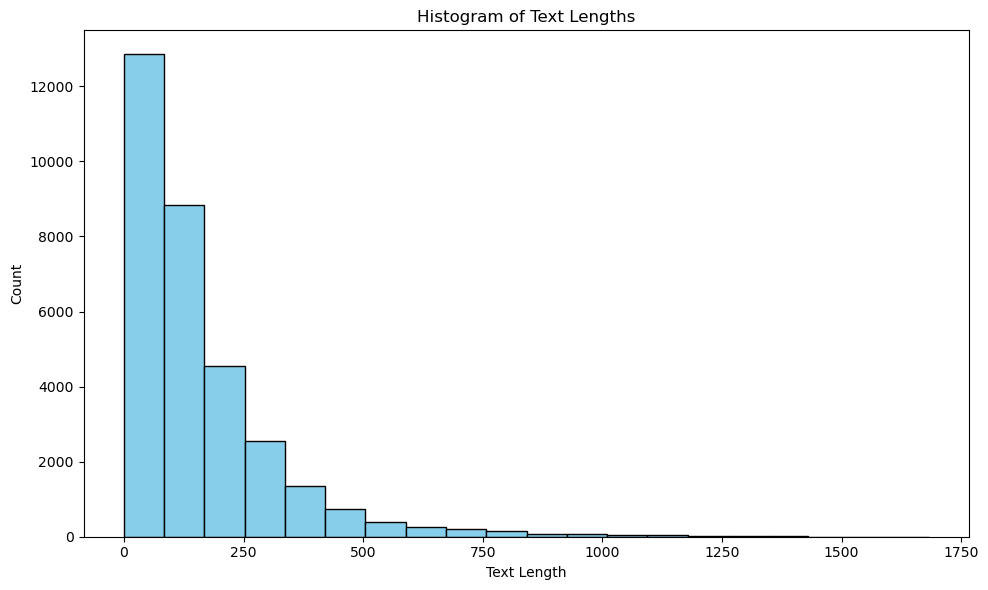

In [110]:
# Create a histogram
plt.figure(figsize=(10, 6))  # 使用相同的 figsize
plt.hist(clean_df['text_len'], bins=20, color='skyblue', edgecolor='black')  # 使用相同的颜色
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [111]:
# Calculate the mean of the text_len column
mean_text_len = clean_df['text_len'].mean()

print(f"The mean text length is: {mean_text_len:.2f}")

The mean text length is: 159.76


# 

# check removed too much text

In clean_df, there are 673 entries with less than 10 characters.


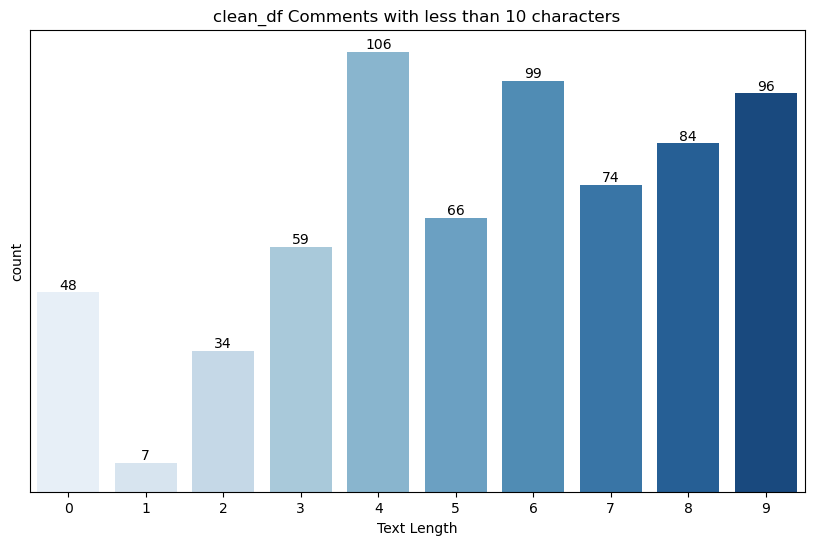

In test_df, there are 274 entries with less than 10 characters.


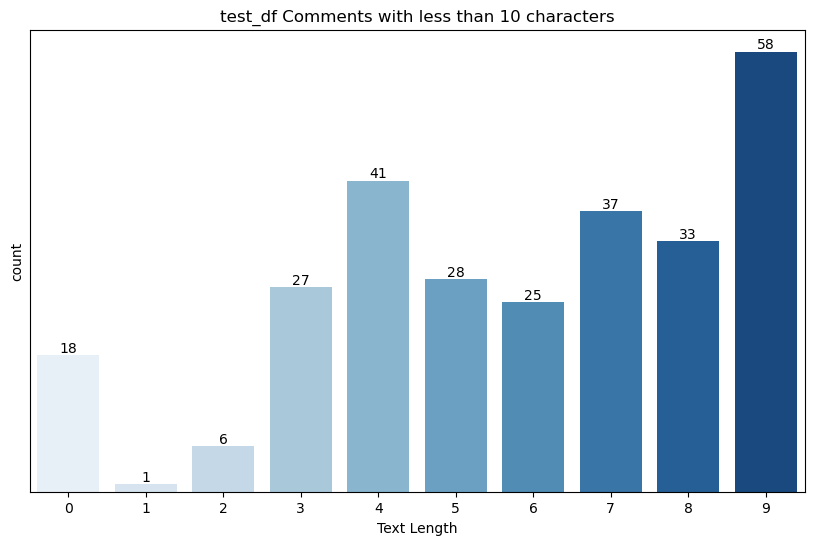

In [112]:
def print_and_plot(df, df_name):
    # Assuming the column name is 'Comments'
    df['text_len'] = df['Cleaned_Comment'].apply(lambda x: len(str(x)))
    short_texts_count = len(df[df['text_len'] < 10])

    # Print the result
    print(f"In {df_name}, there are {short_texts_count} entries with less than 10 characters.")

    # Visualization
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x='text_len', data=df[df['text_len'] < 10], palette='Blues')
    plt.title(f'{df_name} Comments with less than 10 characters')
    plt.yticks([])
    ax.bar_label(ax.containers[0])
    plt.ylabel('count')
    plt.xlabel('Text Length')
    plt.show()

# Call the function for both DataFrames
print_and_plot(clean_df, "clean_df")
print_and_plot(test_df, "test_df")


This means that some tweets contained only mentions, hashtags and links, which have been removed. We will drop these empty tweets and also those with less than 5 words.

In [85]:
# Store the original number of rows
original_clean_df_count = len(clean_df)
original_test_df_count = len(test_df)

def drop_short_and_empty_tweets(df):
    # Drop NaN or empty values
    df.dropna(subset=['Cleaned_Comment'], inplace=True)

    # Drop rows with less than 5 words
    df = df[df['Cleaned_Comment'].apply(lambda x: len(str(x).split()) >= 2)]
    return df

clean_df = drop_short_and_empty_tweets(clean_df)
test_df = drop_short_and_empty_tweets(test_df)

# Calculate and print the percentage drop for clean_df
percentage_drop_clean = (original_clean_df_count - len(clean_df)) / original_clean_df_count * 100
print(f"The percentage of rows dropped from clean_df: {percentage_drop_clean:.2f}%")

# Calculate and print the percentage drop for test_df
percentage_drop_test = (original_test_df_count - len(test_df)) / original_test_df_count * 100
print(f"The percentage of rows dropped from test_df: {percentage_drop_test:.2f}%")


The percentage of rows dropped from clean_df: 1.63%
The percentage of rows dropped from test_df: 1.44%


In [86]:
clean_df

,Comment,sentiment_score,Cleaned_Comment,text_len
29768,"Most likely yes, the front bumper isn't that d...",3,likely yes front bumper n't different plus acc...,58
16767,Well my AUS vin worked...,4,well aus vin worked,19
49106,"Good to hear you are well, it looks like you w...",4,good hear well looks like punched kinetic energy,48
43029,What’s the background to all that road rash? ...,1,background road rash high mileage,33
31984,"Every time I look at the front grills, it's cl...",2,every time look front grills 's closed lol art...,156
...,...,...,...,...
40861,"Thanks Jetbeam, very clear and concise advise ...",4,thanks jetbeam clear concise advise gladly tak...,158
13321,The weather was so nice this morning I took th...,5,weather nice morning took opportunity break op...,172
44047,Had my first service notice pop up on the dash...,1,first service notice pop dash couple days ago ...,395
42888,"If it can keep up with you !!Dont know, I expe...",3,keep dont know expect 'd give approx location ...,116


# Training data deeper cleaning

In [87]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [88]:
token_lens = []

for txt in clean_df['Cleaned_Comment'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [89]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 384


# Test data deeper cleaning

In [90]:
token_lens_test = []

for txt in test_df['Cleaned_Comment'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [91]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 341


perform a further cleaning checking the tokenizer version of the sentences.\

# Sentiment column analysis 

In [29]:
clean_df['sentiment_score'].value_counts()

sentiment_score
3    8352
2    5578
1    5487
4    5209
5    4122
Name: count, dtype: int64

In [30]:
# 定义要替换的值
replace_values = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}

# 使用replace函数应用这些替换
clean_df['sentiment_score'] = clean_df['sentiment_score'].replace(replace_values)
test_df['sentiment_score'] = test_df['sentiment_score'].replace(replace_values)

/var/folders/6t/smh8jz1x54qg9kcw_mdl7zdc0000gn/T/ipykernel_20697/4130091352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sentiment_score'] = clean_df['sentiment_score'].replace(replace_values)


In [31]:
test_df

,Comment,sentiment_score,Cleaned_Comment,text_len
42886,"Doesn't matter if the car is with you, they wi...",1,n't matter car track locate wherever happens t...,117
37489,Unfortunately mine are mostly short trips. Bes...,0,unfortunately mine mostly short trips best far...,127
26630,Having looked at a number of YouTube videos on...,0,looked number youtube videos 2020 x3 've notic...,366
10542,donkmeister said:SidewaysSi said:Triumph Man s...,1,donkmeister said sidewayssi said triumph man s...,1008
35357,ok cheers i was thinking there shouldnt be too...,1,ok cheers thinking shouldnt much difference,43
...,...,...,...,...
58936,"Last year I sold two cars, one via WBAC and on...",2,last year sold two cars one via wbac one via m...,284
47492,The front of the S looks so much nicer than th...,2,front looks much nicer gts,26
36821,I only drive my SQ5 at weekends really - in th...,1,drive sq5 weekends really week joy 14 year old...,115
47239,Red is a marmite colour. I love it. Suits all ...,2,red marmite colour love suits colours except r...,55


In [32]:
clean_df['sentiment_score'].value_counts()

sentiment_score
0    11065
2     9331
1     8352
Name: count, dtype: int64

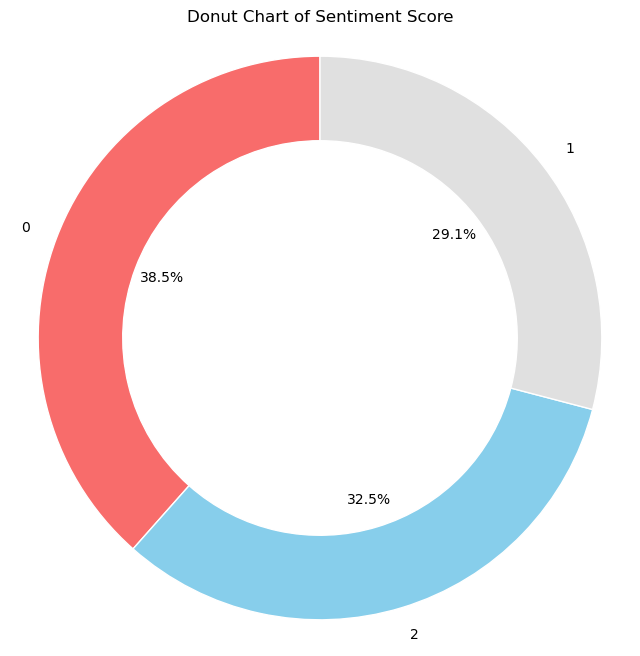

In [65]:
# Ensure 'sentiment_score' contains only 0, 1, or 2
clean_df = clean_df[clean_df['sentiment_score'].isin([0, 1, 2])]

# Get counts for each sentiment score
counts = clean_df['sentiment_score'].value_counts()

# Specify colors for each score
colors = {0: '#f86c6b', 1: '#e0e0e0', 2: 'skyblue'}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, colors=[colors[i] for i in counts.index], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Donut Chart of Sentiment Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# ****

# Train-Validation split

In [33]:
X = clean_df['Cleaned_Comment'].values
y = clean_df['sentiment_score'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

X_test = test_df['Cleaned_Comment'].values
y_test = test_df['sentiment_score'].values

# Oversampling training data

In [34]:
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(-1, 1), y_train);
X_train_resampled = [x[0] for x in X_train_resampled]

In [35]:
# Display value counts for y_train
print("Value counts for y_train:")
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values_train, counts_train):
    print(f"Value: {value}, Count: {count}")
print()

# Display value counts for y_train_resampled
print("Value counts for y_train_resampled:")
unique_values_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
for value, count in zip(unique_values_resampled, counts_resampled):
    print(f"Value: {value}, Count: {count}")


Value counts for y_train:
Value: 0, Count: 9958
Value: 1, Count: 7517
Value: 2, Count: 8398

Value counts for y_train_resampled:
Value: 0, Count: 9958
Value: 1, Count: 9958
Value: 2, Count: 9958


# Baseline model: Naive Bayes Classifier

In [36]:
# Label Encoding y
le = LabelEncoder()
y_train_le = le.fit_transform(y_train_resampled)
y_valid_le = le.transform(y_valid)
y_test_le = le.transform(y_test)

# Count Vectorization and TF-IDF Transformation
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_resampled)
X_valid_cv = clf.transform(X_valid)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

# Naive Bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)

In [37]:
# Count Vectorization and TF-IDF Transformation
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_resampled)
X_valid_cv = clf.transform(X_valid)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

# Naive Bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)

In [38]:
nb_pred = nb_clf.predict(X_test_tf)

In [39]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.61      0.60      0.60      4764
     Neutral       0.47      0.51      0.49      3568
    Positive       0.57      0.54      0.56      4020

    accuracy                           0.55     12352
   macro avg       0.55      0.55      0.55     12352
weighted avg       0.56      0.55      0.55     12352



# Support Vector Machine Classifier

In [41]:
# Count Vectorization and TF-IDF Transformation
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_resampled)
X_valid_cv = clf.transform(X_valid)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf = tf_transformer.transform(X_test_cv)


In [42]:
# Support Vector Machine Classifier
svm_clf = LinearSVC(max_iter=10000) # max_iter can be adjusted based on convergence requirements
svm_clf.fit(X_train_tf, y_train_le)
svm_pred = svm_clf.predict(X_test_tf)

# Optional: Check the performance using classification report
print(classification_report(y_test_le, svm_pred))


              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4764
           1       0.48      0.49      0.49      3568
           2       0.57      0.57      0.57      4020

    accuracy                           0.57     12352
   macro avg       0.56      0.56      0.56     12352
weighted avg       0.57      0.57      0.57     12352



#  Random Forest Classifier

In [44]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust the number of trees using n_estimators
rf_clf.fit(X_train_tf, y_train_le)
rf_pred = rf_clf.predict(X_test_tf)

# Check the performance using classification report
print(classification_report(y_test_le, rf_pred))


              precision    recall  f1-score   support

           0       0.56      0.71      0.63      4764
           1       0.52      0.43      0.47      3568
           2       0.60      0.51      0.55      4020

    accuracy                           0.56     12352
   macro avg       0.56      0.55      0.55     12352
weighted avg       0.56      0.56      0.56     12352



# Classification Matrix Comparison

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison\n Confusion Matrix', fontsize=20)


sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[0], annot_kws={"size":25})

ax[0].set_title('BERT Classifier', fontsize=20)
ax[0].set_yticklabels(labels, fontsize=17);
ax[0].set_xticklabels(labels, fontsize=17);
ax[0].set_ylabel('Test', fontsize=20)
ax[0].set_xlabel('Predicted', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_roberta.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1], annot_kws={"size":25})
ax[1].set_title('RoBERTa Classifier', fontsize=20)
ax[1].set_yticklabels(labels, fontsize=17);
ax[1].set_xticklabels(labels, fontsize=17);
ax[1].set_ylabel('Test', fontsize=20)
ax[1].set_xlabel('Predicted', fontsize=20)


plt.show()